In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [77]:
data = pd.read_csv('pklot_combined_bbox_rbox.csv')
data['rotated_bbox'] = data['rotated_bbox'].map(lambda x: np.array([int(num) for num in x.split()]))
data['rotated_bbox'] = data['rotated_bbox'].map(lambda x: np.split(x, len(x) / 5))
data['occupied'] = data['occupied'].map(lambda x: [int(num) for num in x.split()])
data['image_path'] = data['image_path'].map(lambda x: Path(x))
data.head()

,image_path,occupied,rotated_bbox
0,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[651, 636, 141, 83, -34], [705, 563, 139, 77,..."
1,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[651, 636, 141, 83, -34], [705, 563, 139, 77,..."
2,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[651, 636, 141, 83, -34], [705, 563, 139, 77,..."
3,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[651, 636, 141, 83, -34], [705, 563, 139, 77,..."
4,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[651, 636, 141, 83, -34], [705, 563, 139, 77,..."


In [79]:
cxs = [bbox[0] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
cys = [bbox[1] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
ws = [bbox[3] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
hs = [bbox[2] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
angles = [bbox[4] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
occupied_list = [item for sublist in data['occupied'].values for item in sublist]

#flat_list = [item for sublist in l for item in sublist]

parking_spots = pd.DataFrame({'cx': cxs, 'cy': cys, 'w': ws, 'h': hs, 'a': angles, 'occupied': occupied_list})
# for index, row in tqdm(data.iterrows()):
#     path = row['image_path']
#     occupied_list = row['occupied']
#     bbox_list = row['rotated_bbox']
#     for i in range(len(occupied_list)):
#         parking_spots[cnt] = [path, bbox_list[i][0], bbox_list[i][1], bbox_list[i][3], bbox_list[i][2], bbox_list[i][4], occupied_list[i]]
#         cnt += 1

In [80]:
parking_spots.head()

,cx,cy,w,h,a,occupied
0,651,636,83,141,-34,0
1,705,563,77,139,-44,1
2,732,480,60,124,-48,1
3,762,409,54,113,-51,0
4,773,346,49,109,-56,0


In [81]:
parking_spots.describe()

,cx,cy,w,h,a,occupied
count,540608.000000,540608.000000,540608.000000,540608.000000,540608.000000,540608.000000
mean,490.753187,179.934944,53.192914,64.428025,-57.230979,0.488827
std,286.193181,133.548312,18.051512,32.076322,32.567436,0.499876
min,7.000000,8.000000,29.000000,26.000000,-88.000000,0.000000
25%,281.000000,91.000000,42.000000,39.000000,-83.000000,0.000000
50%,459.000000,145.000000,48.000000,53.000000,-76.000000,0.000000
75%,693.000000,256.000000,61.000000,85.000000,-25.000000,1.000000
max,1195.000000,649.000000,172.000000,176.000000,0.000000,1.000000


/home/pooya32kh/miniconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


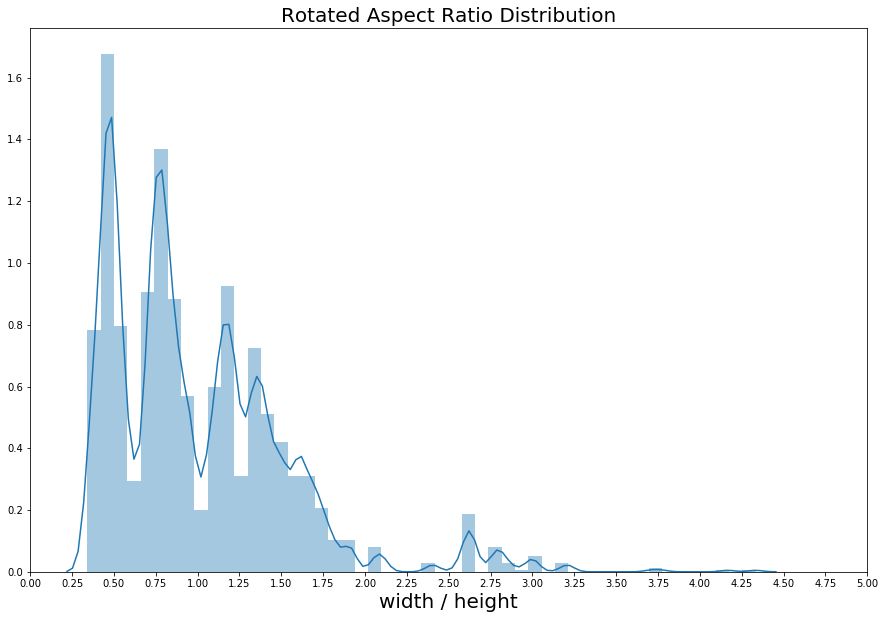

In [106]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_title("Rotated Aspect Ratio Distribution", fontsize=20)
ax.set_xlabel('width / height', fontsize=20)

sns.distplot(parking_spots['w']/parking_spots['h'], bins=50)
plt.xticks(np.linspace(0, 5, 21))
plt.savefig("Rotated Aspect Ratio Distribution")
plt.show()

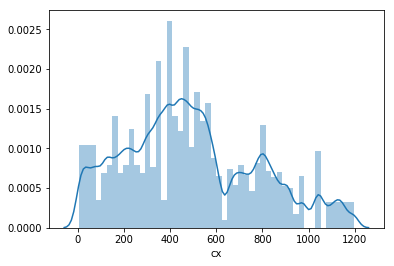

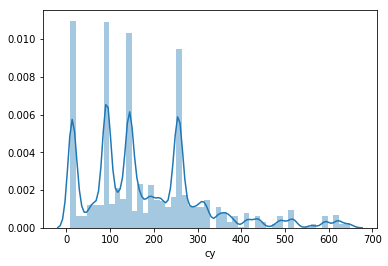

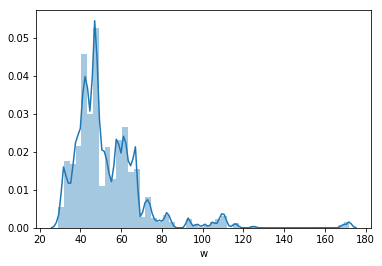

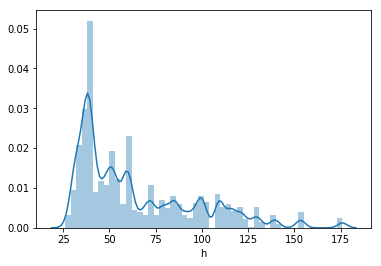

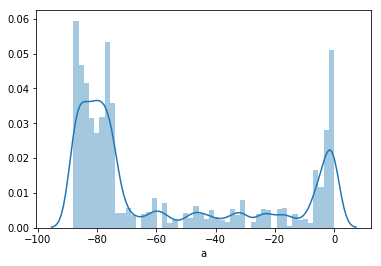

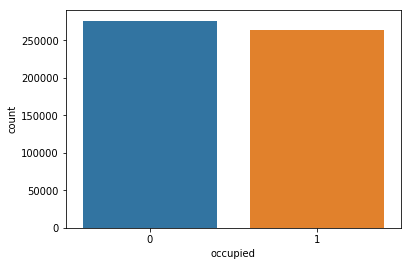

In [83]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_title("Rotated Aspect Ratio Distribution", fontsize=20)
ax.set_xlabel('width / height', fontsize=20)

sns.distplot(parking_spots['w']/parking_spots['h'], bins=50)
plt.xticks(np.linspace(0, 5, 21))
plt.savefig
plt.show()

In [84]:
data = pd.read_csv('pklot_non_rotated.csv')
data['rotated_bbox'] = data['rotated_bbox'].map(lambda x: np.array([int(num) for num in x.split()]))
data['rotated_bbox'] = data['rotated_bbox'].map(lambda x: np.split(x, len(x) / 4))
data['occupied'] = data['occupied'].map(lambda x: [int(num) for num in x.split()])
data['image_path'] = data['image_path'].map(lambda x: Path(x))
data.head()

,image_path,occupied,rotated_bbox
0,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[577, 554, 724, 717], [629, 486, 780, 639], [..."
1,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[577, 554, 724, 717], [629, 486, 780, 639], [..."
2,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[577, 554, 724, 717], [629, 486, 780, 639], [..."
3,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[577, 554, 724, 717], [629, 486, 780, 639], [..."
4,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[577, 554, 724, 717], [629, 486, 780, 639], [..."


In [85]:
occupied_list = [item for sublist in data['occupied'].values for item in sublist]
xmins = [bbox[0] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
ymins = [bbox[1] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
xmaxs = [bbox[2] for bboxes in data['rotated_bbox'].values for bbox in bboxes]
ymaxs = [bbox[3] for bboxes in data['rotated_bbox'].values for bbox in bboxes]

print(list(map(lambda x: len(x), [xmins, ymins, xmaxs, ymaxs, occupied_list]))) 
rectangle_spots = pd.DataFrame({'xmin': xmins, 'ymin': ymins, 'xmax': xmaxs, 'ymax': ymaxs, 'occupied': occupied_list})
rectangle_spots.head()

[540608, 540608, 540608, 540608, 540608]


,xmin,ymin,xmax,ymax,occupied
0,577,554,724,717,0
1,629,486,780,639,1
2,665,416,798,543,1
3,701,352,822,465,0
4,714,295,831,396,0


In [86]:
rectangle_spots.describe()

,xmin,ymin,xmax,ymax,occupied
count,540608.000000,540608.000000,540608.000000,540608.000000,540608.000000
mean,453.890098,146.432927,526.690149,212.585892,0.488827
std,277.022182,123.994929,296.171791,143.167698,0.499876
min,-18.000000,-14.000000,32.000000,26.000000,0.000000
25%,260.000000,64.000000,303.000000,115.000000,0.000000
50%,413.000000,117.000000,494.000000,178.000000,0.000000
75%,632.000000,222.000000,749.000000,288.000000,1.000000
max,1130.000000,586.000000,1259.000000,717.000000,1.000000


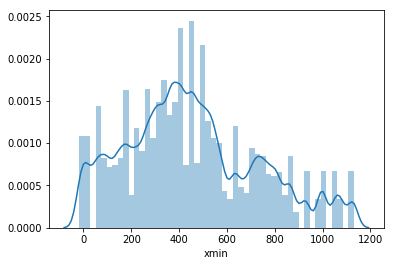

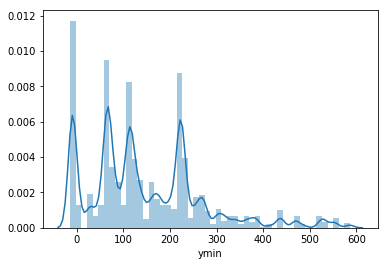

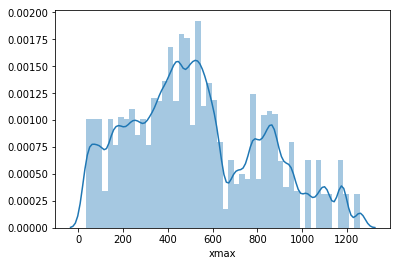

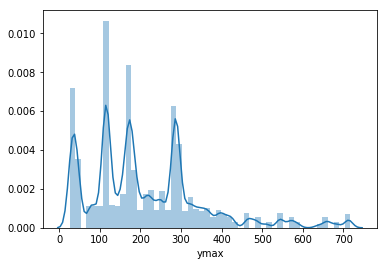

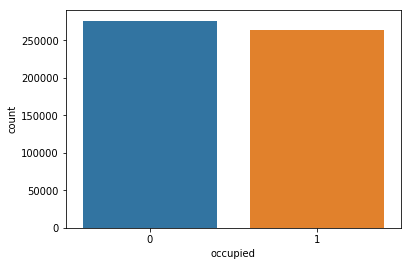

In [87]:
for column in rectangle_spots.drop('occupied', axis=1):
    sns.distplot(rectangle_spots[column])
    plt.show()
sns.countplot(rectangle_spots['occupied'])
plt.show()

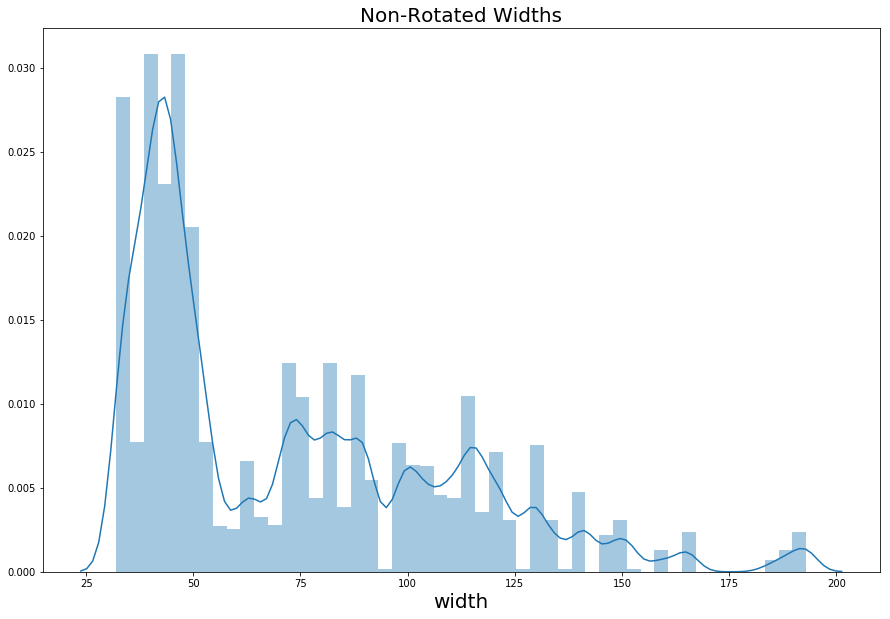

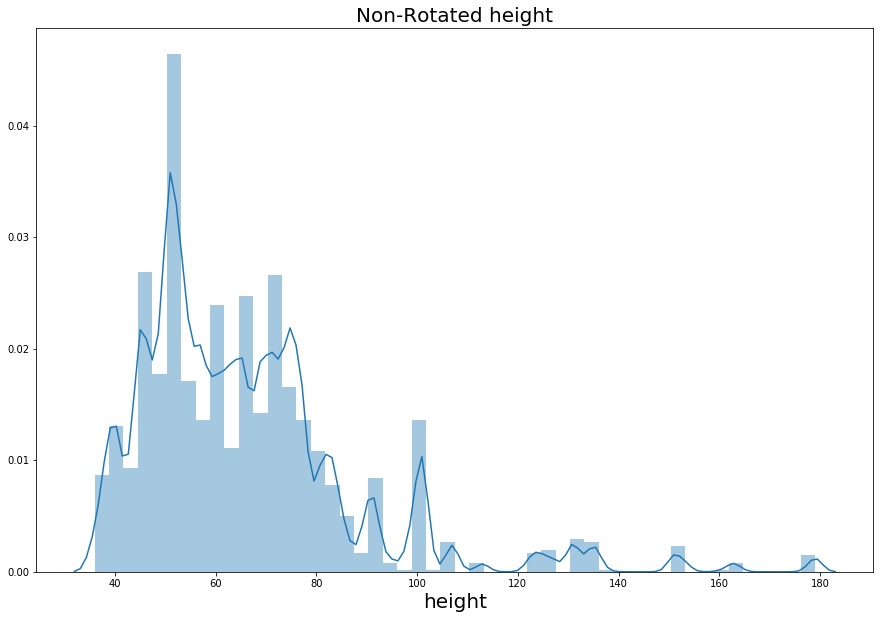

In [102]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_title("Non-Rotated Widths", fontsize=20)
ax.set_xlabel('width', fontsize=20)
sns.distplot(rectangle_spots['xmax']-rectangle_spots['xmin'], bins=50)
plt.show()
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_title("Non-Rotated height", fontsize=20)
ax.set_xlabel('height', fontsize=20)
sns.distplot(rectangle_spots['ymax']-rectangle_spots['ymin'], bins=50)
plt.show()

/home/pooya32kh/miniconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


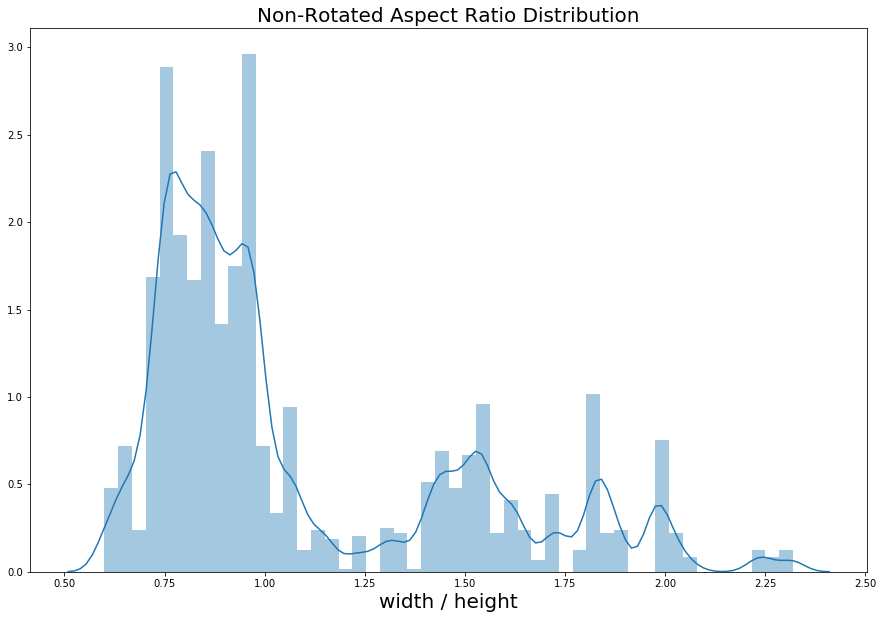

In [105]:
aspect_ratios = (rectangle_spots['xmax']-rectangle_spots['xmin']) / (rectangle_spots['ymax']-rectangle_spots['ymin'])
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_title("Non-Rotated Aspect Ratio Distribution", fontsize=20)
ax.set_xlabel('width / height', fontsize=20)
sns.distplot(aspect_ratios, bins=50)
plt.savefig("Non-Rotated Aspect Ratio Distribution")
plt.show()

In [107]:
!ls

AAAAA Nvidia Server ORIGINAL SERVER.txt
airbus
a-PyTorch-Tutorial-to-Object-Detection
Brennan-Bounding_Box.ipynb
Brennan-Classification.ipynb
Brongan.ipynb
data
Data Aggregator.ipynb
Data Aggregator - Separated DFs.ipynb
Dataset Analysis.ipynb
Evaluation.ipynb
fastai
hello.json
Image Preprocessing - Bad PKLot stuff.ipynb
Image Transformation.ipynb
json
jsonifier.ipynb
LossAnchorGrid.ipynb
LossTransfromedAnchorGrid.ipynb
models
Non-Rotated Aspect Ratio Distribution.png
outpy.avi
Pascal-Multi-With-Cars.ipynb
pixel_mask.ipynb
PKLot
pklot_bbox_data.csv
pklot_class_data.csv
pklot_combined_bbox_rbox.csv
pklot_contour_data.csv
pklot_formatted_data.csv
pklot_non_rotated.csv
PKLot.tar.gz
Plan B | Analysis.ipynb
plan B | rotated = gone.ipynb
Pooya.ipynb
PUCPR_cropped.csv
__pycache__
PyTorch-YOLOv3
Raymond-Copy1.ipynb
Raymond.ipynb
Rotated Aspect Ratio Distribution.png
singleshotdetector
ssd.pytorch
test.csv
TestVideos
torchtest.net
Untitled.ipynb
VideoTestRecodring.ipynb
